In [119]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [120]:
servers = ["MacBookPro1.csv", "MacBookPro2.csv", "VM.csv", "RasberryPi.csv"]
data_servers = [pd.read_csv(server) for server in servers]

In [121]:
data_servers[1]

,Time,Execution Time
0,Thu Nov 26 13:05:57 2020,0.317357
1,Thu Nov 26 13:05:58 2020,0.279308
2,Thu Nov 26 13:06:00 2020,0.408502
3,Thu Nov 26 13:06:01 2020,0.308506
4,Thu Nov 26 13:06:02 2020,0.304770
...,...,...
995,Thu Nov 26 13:30:13 2020,0.317314
996,Thu Nov 26 13:30:14 2020,0.420824
997,Thu Nov 26 13:30:16 2020,0.408360
998,Thu Nov 26 13:30:17 2020,0.355195


In [122]:
cpus = ['cpu-full-a.csv', 'cpu-full-b.csv', 'cpu-train-a.csv', 'cpu-train-b.csv', 'cpu-test-a.csv', 'cpu-test-b.csv']
data_cpus = [pd.read_csv(cpu) for cpu in cpus]

In [123]:
data_cpus[1]

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08
...,...,...
655,2017-01-28 05:37:00,2.55
656,2017-01-28 05:38:00,2.23
657,2017-01-28 05:39:00,2.11
658,2017-01-28 05:40:00,2.17


## Latency

In [124]:
def latency(data):
    # Calculate the mean and variance of the turnaround time (TAT) for each server.
    for i, df in enumerate(data):
        mean_tat = df.iloc[:, 1].mean()
        var_tat = df.iloc[:, 1].var()
        print(f"Server {i+1}: Mean TAT = {mean_tat}, Variance TAT = {var_tat}")
    # Fit the TAT data using an appropriate statistical distribution (e.g., normal).
    for i, df in enumerate(data):
        tat = df.iloc[:, 1]
        mu, std = stats.norm.fit(tat)
        plt.figure(i)
        plt.hist(tat, bins=30, density=True, alpha=0.6, color='g')
    
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = f"Server {i+1}: Fit results: mu = {mu}, std = {std}"
        plt.title(title)
        plt.show()

Server 1: Mean TAT = 0.10815345335006711, Variance TAT = 5.832186598908575e-05
Server 2: Mean TAT = 0.34829165410995483, Variance TAT = 0.008515416574744594
Server 3: Mean TAT = 0.42681368184089663, Variance TAT = 0.4181247429071413
Server 4: Mean TAT = 1.0169308009147644, Variance TAT = 0.01670383288729607


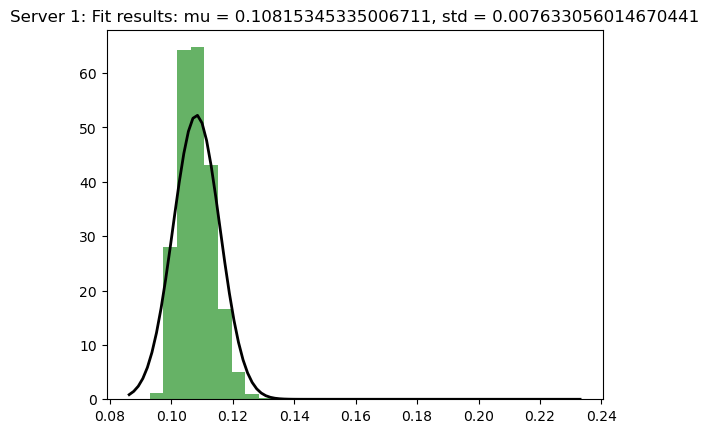

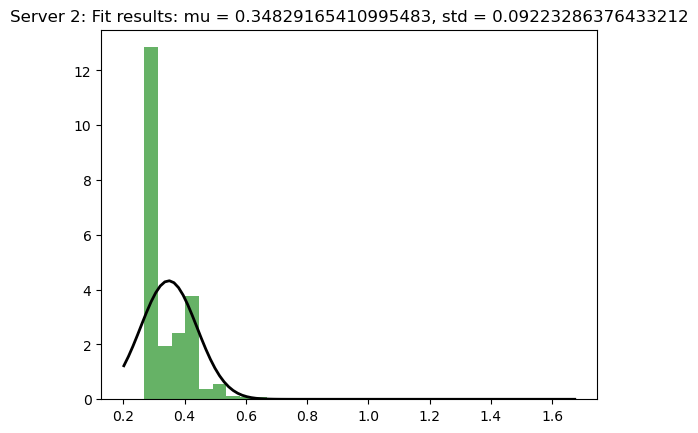

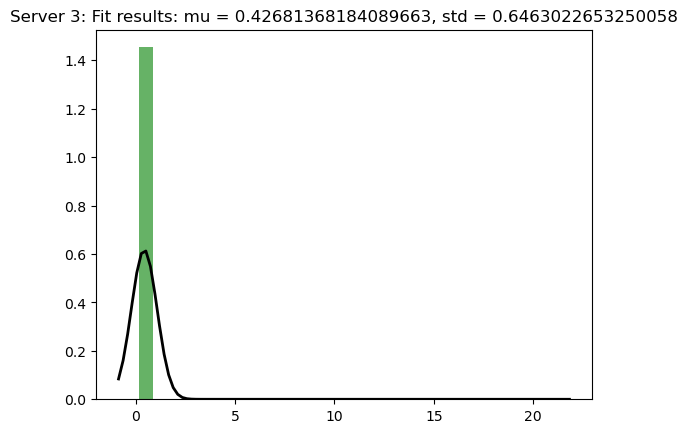

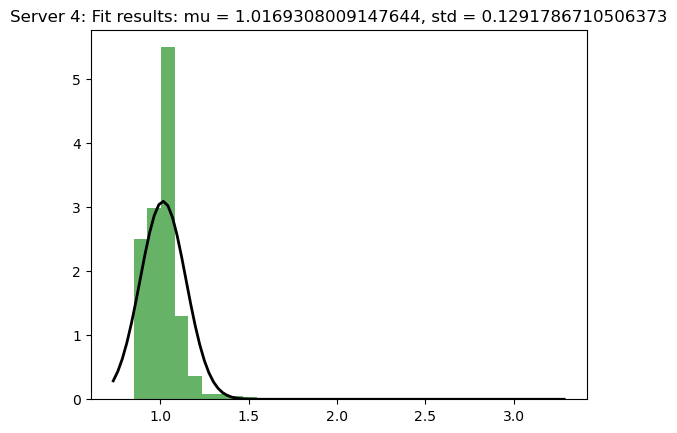

In [125]:
latency(data_servers)

Server 1: Mean TAT = 1.2380416666666667, Variance TAT = 0.24538404836464844
Server 2: Mean TAT = 1.288469696969697, Variance TAT = 0.2956833905826088
Server 3: Mean TAT = 1.233261904761905, Variance TAT = 0.25569983577679284
Server 4: Mean TAT = 1.2827333333333333, Variance TAT = 0.23517782526432907
Server 5: Mean TAT = 1.2715, Variance TAT = 0.1749824576271185
Server 6: Mean TAT = 1.3458333333333337, Variance TAT = 0.9112992937853107


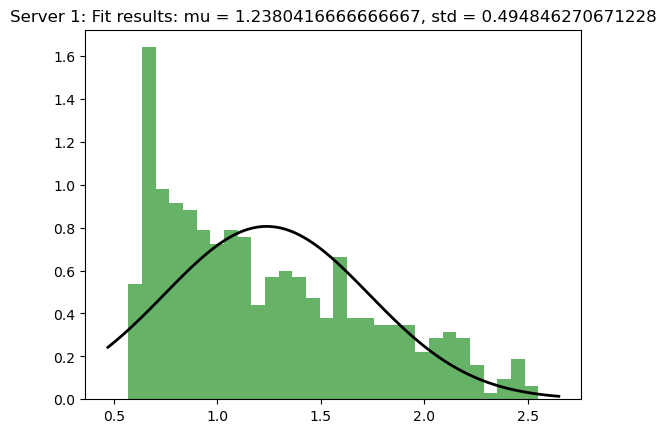

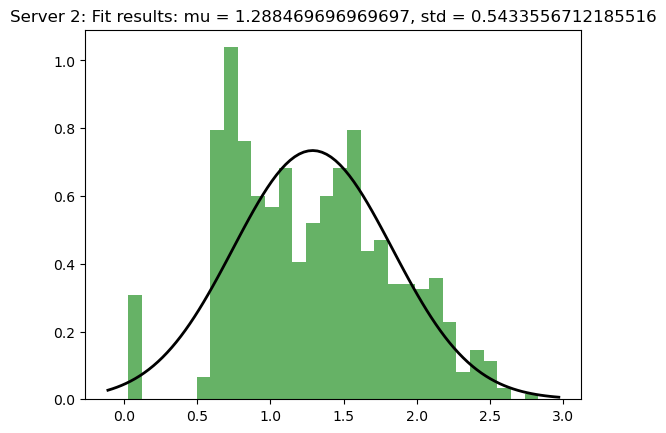

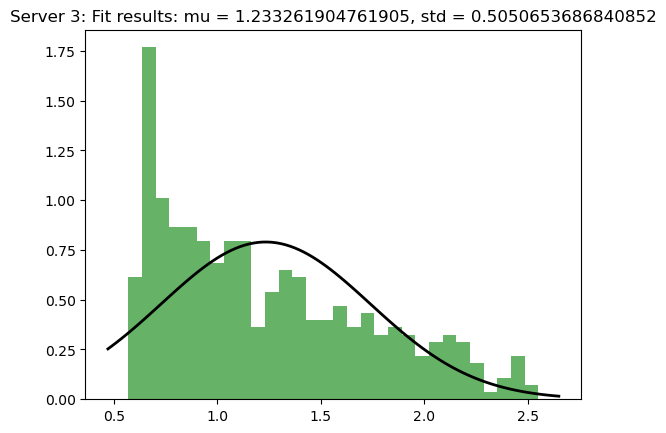

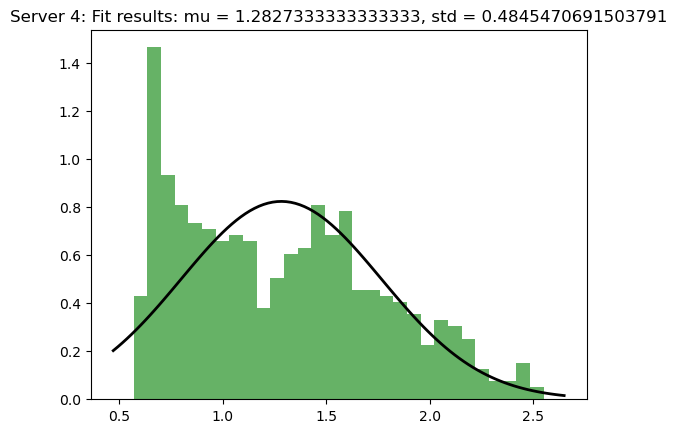

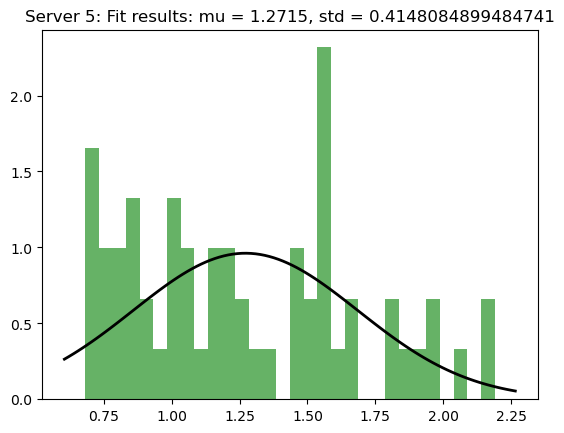

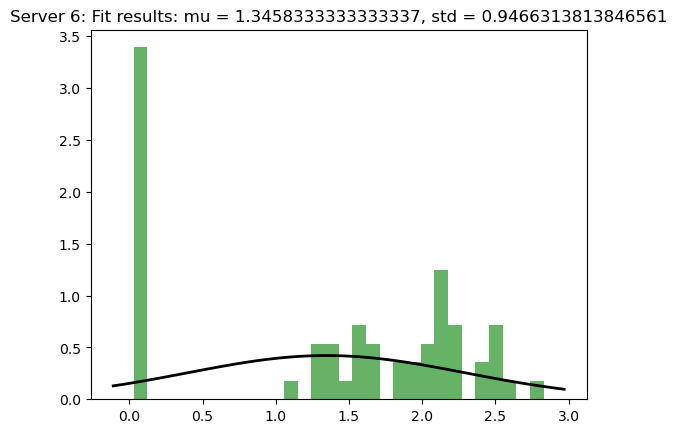

In [126]:
latency(data_cpus)

## Load

In [134]:
def load(data):
    inspection_interval = 5  # Defining the detection interval: 5 seconds
    
    # For each server, the number of tasks arriving and completing in each detection interval is calculated.
    load_data = []  # store data on the number of tasks per server
    for i, df in enumerate(data):
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])  # Convert the first column to datetime
        df.set_index(df.iloc[:, 0], inplace=True)  # Setting the first column as an index
        counts = df.resample(f'{inspection_interval}s').size()
        load_data.append(counts)
        print(f"Server {i+1} Task Counts per {inspection_interval} seconds interval:\n", counts)
        
    # A probability distribution model is fitted to the distribution of the number of task arrivals and completions for each server.
    for i, counts in enumerate(load_data):
        mu, std = stats.norm.fit(counts)
        plt.figure(i)
        plt.hist(counts, bins=30, density=True, alpha=0.6, color='g')
    
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = f"Server {i+1}: Fit results: mu = {mu}, std = {std}"
    
        plt.title(title)
        plt.xlabel('Number of Tasks per Interval')
        plt.ylabel('Density')
        plt.show()

Server 1 Task Counts per 5 seconds interval:
 Time
2020-11-26 14:47:35    2
2020-11-26 14:47:40    4
2020-11-26 14:47:45    5
2020-11-26 14:47:50    4
2020-11-26 14:47:55    5
                      ..
2020-11-26 15:05:50    4
2020-11-26 15:05:55    5
2020-11-26 15:06:00    4
2020-11-26 15:06:05    5
2020-11-26 15:06:10    1
Freq: 5s, Length: 224, dtype: int64
Server 2 Task Counts per 5 seconds interval:
 Time
2020-11-26 13:05:55    2
2020-11-26 13:06:00    4
2020-11-26 13:06:05    3
2020-11-26 13:06:10    4
2020-11-26 13:06:15    4
                      ..
2020-11-26 13:29:55    4
2020-11-26 13:30:00    3
2020-11-26 13:30:05    3
2020-11-26 13:30:10    4
2020-11-26 13:30:15    3
Freq: 5s, Length: 293, dtype: int64
Server 3 Task Counts per 5 seconds interval:
 Time
2020-11-26 15:16:30    4
2020-11-26 15:16:35    4
2020-11-26 15:16:40    4
2020-11-26 15:16:45    4
2020-11-26 15:16:50    5
                      ..
2020-11-26 15:40:00    4
2020-11-26 15:40:05    3
2020-11-26 15:40:10    4


C:\Users\Lenovo\.conda\envs\Project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Lenovo\.conda\envs\Project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Lenovo\.conda\envs\Project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the

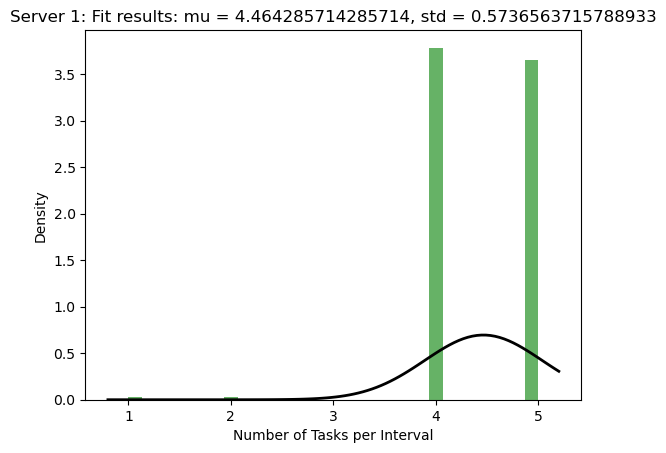

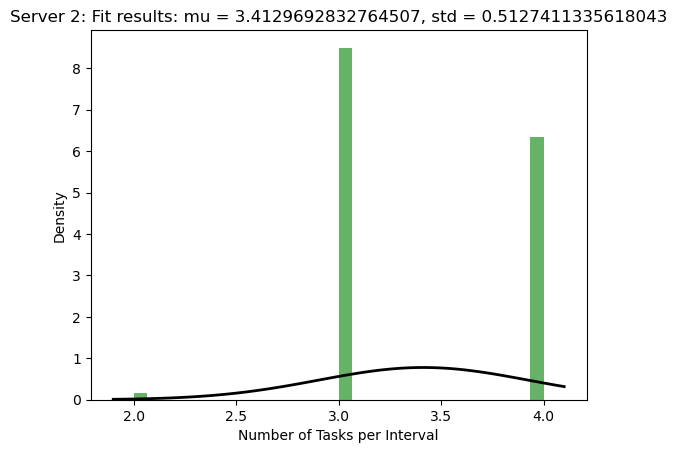

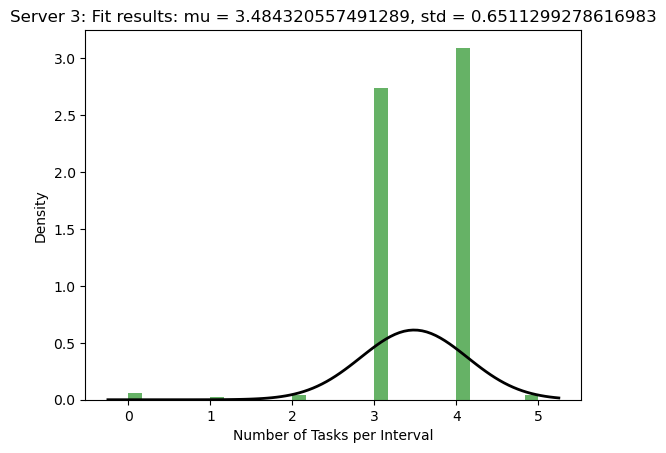

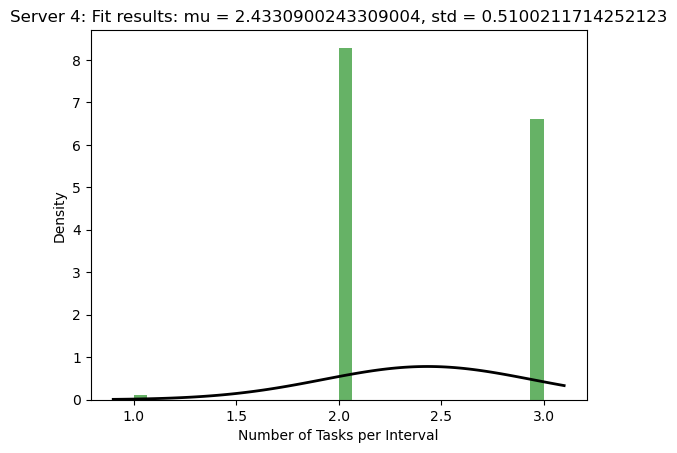

In [135]:
load(data_servers)

Server 1 Task Counts per 5 seconds interval:
 datetime
2017-01-27 18:42:00    1
2017-01-27 18:42:05    0
2017-01-27 18:42:10    0
2017-01-27 18:42:15    0
2017-01-27 18:42:20    0
                      ..
2017-01-28 02:40:40    0
2017-01-28 02:40:45    0
2017-01-28 02:40:50    0
2017-01-28 02:40:55    0
2017-01-28 02:41:00    1
Freq: 5s, Length: 5749, dtype: int64
Server 2 Task Counts per 5 seconds interval:
 datetime
2017-01-27 18:42:00    1
2017-01-27 18:42:05    0
2017-01-27 18:42:10    0
2017-01-27 18:42:15    0
2017-01-27 18:42:20    0
                      ..
2017-01-28 05:40:40    0
2017-01-28 05:40:45    0
2017-01-28 05:40:50    0
2017-01-28 05:40:55    0
2017-01-28 05:41:00    1
Freq: 5s, Length: 7909, dtype: int64
Server 3 Task Counts per 5 seconds interval:
 datetime
2017-01-27 18:42:00    1
2017-01-27 18:42:05    0
2017-01-27 18:42:10    0
2017-01-27 18:42:15    0
2017-01-27 18:42:20    0
                      ..
2017-01-28 01:40:40    0
2017-01-28 01:40:45    0
2017-01-28 

C:\Users\Lenovo\.conda\envs\Project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Lenovo\.conda\envs\Project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Lenovo\.conda\envs\Project\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the

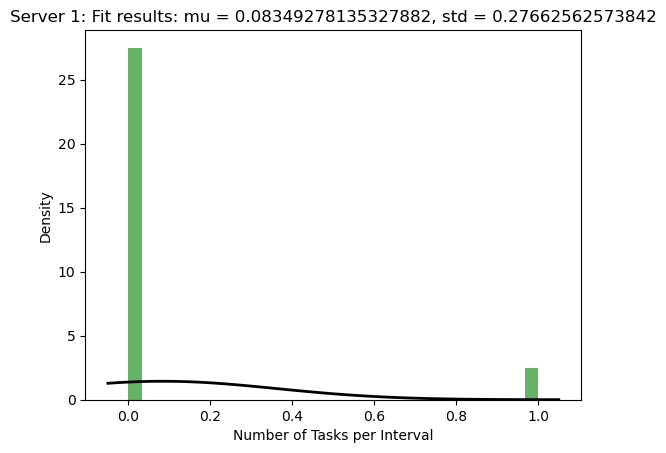

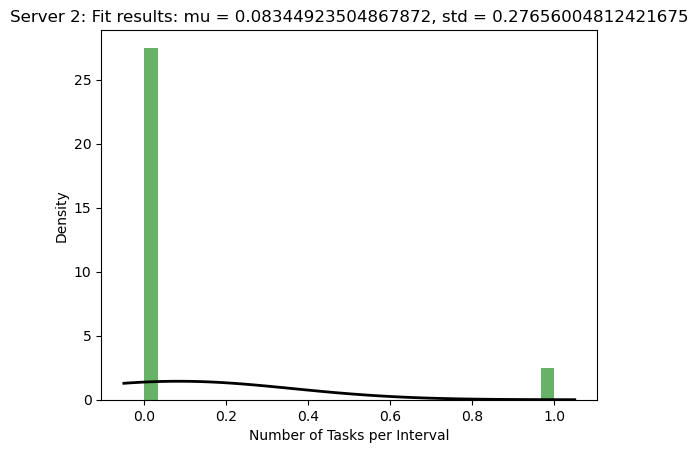

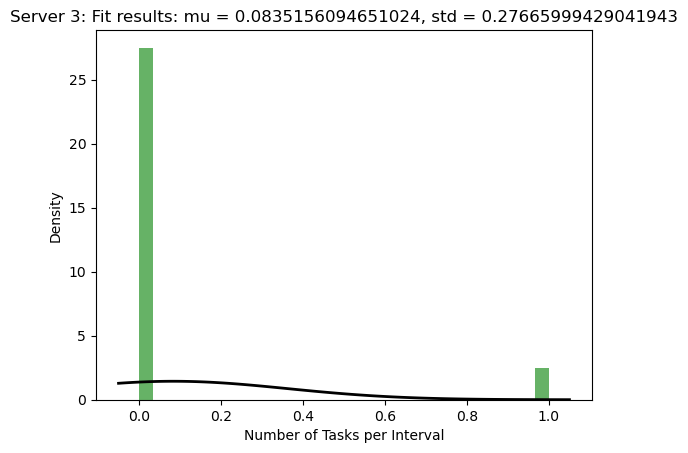

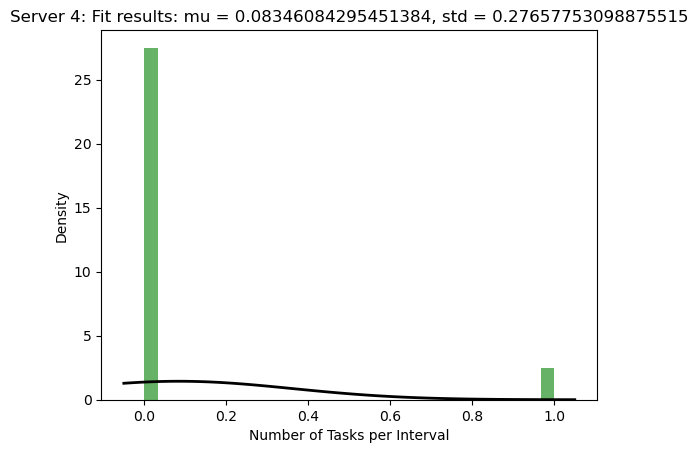

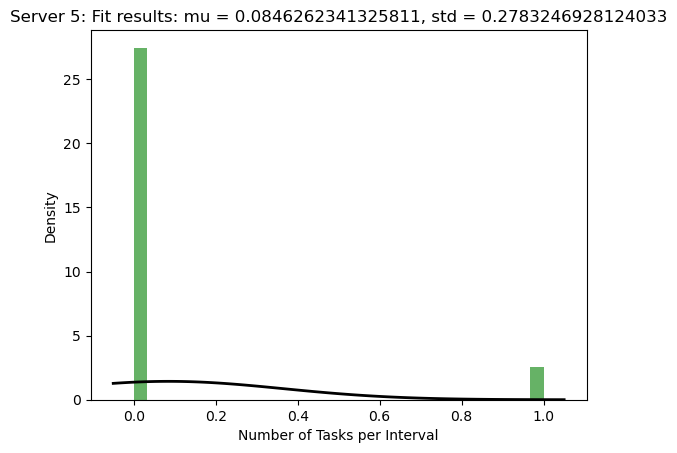

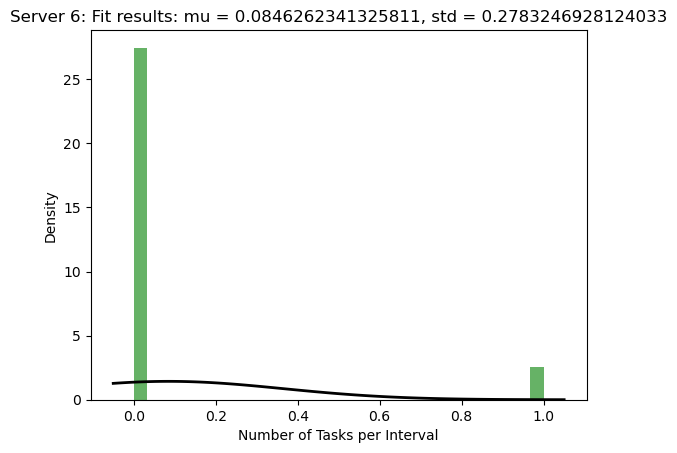

In [136]:
load(data_cpus)